In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
import openpyxl

In [4]:
# Import data
data = pd.read_excel('cleaned_gym_churn_data.xlsx')

In [5]:
# An overview of the dataset
data.head()

,Customer ID,gender,Near_Location,Partner,Promo_friends,Phone,Contract_plan,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,Contract_period,Contract_renew_potential
0,1,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0,8,1
1,2,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0,19,1
2,3,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0,3,1
3,4,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0,14,1
4,5,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0,4,1


In [6]:
# Remove unused columns
data = data.drop(columns = ['Customer ID','Phone'])

In [7]:
# Correlation matrix of features
data.corr()

,gender,Near_Location,Partner,Promo_friends,Contract_plan,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,Contract_period,Contract_renew_potential
gender,1.000000,0.006699,-0.010463,-0.005033,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708,0.007519,0.016590
Near_Location,0.006699,1.000000,-0.005119,0.210964,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098,0.143519,0.020710
Partner,-0.010463,-0.005119,1.000000,0.451960,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986,0.241782,0.035388
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233,0.210782,0.038764
Contract_plan,0.000502,0.150233,0.306166,0.244552,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984,0.779024,0.015712
Group_visits,0.017879,0.154728,0.022710,0.120170,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325,0.160233,0.033988
Age,0.013807,0.058358,0.047480,0.050113,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735,0.195025,0.150153
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697,0.127776,0.077465
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393,0.791691,0.089012
Lifetime,0.013579,0.070921,0.061229,0.072721,0.170725,0.075853,0.164693,0.079028,0.161078,1.000000,0.112338,0.181975,-0.438220,0.730467,0.378399


<Axes: >

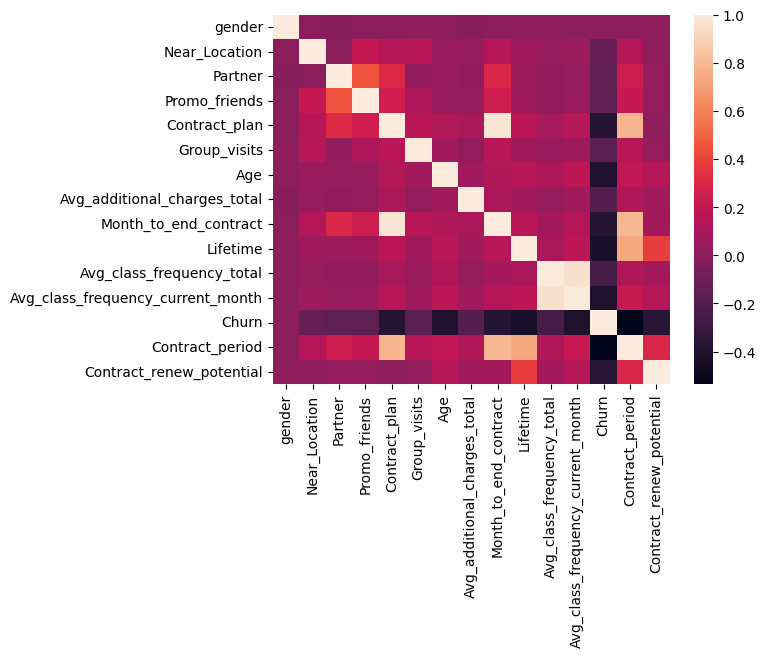

In [8]:
# A visualization of the correlation matrix
sns.heatmap(data.corr())

To satisfy the assumption of minimal multicollinearity in logistic regression, highly correlated independent variables should be assessed and, where necessary, removed to improve model stability and interpretability.

In [9]:
data = data.drop(columns = ['Month_to_end_contract','Contract_period','Avg_class_frequency_total'])

In [10]:
# Import packages for modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from ISLP import confusion_table

In [11]:
# Independent variable is Churn column (1 if churned, 0 if not)
X = data.drop(columns = 'Churn')
y = data['Churn']

In [12]:
# Verify whether scaling is necessary
X.std()

gender                                0.499957
Near_Location                         0.361711
Partner                               0.499887
Promo_friends                         0.461932
Contract_plan                         4.549706
Group_visits                          0.492301
Age                                   3.258367
Avg_additional_charges_total         96.355602
Lifetime                              3.749267
Avg_class_frequency_current_month     1.052906
Contract_renew_potential              0.375019
dtype: float64

In [13]:
# Check for possible class imbalance in the response variable
y.value_counts()

Churn
0    2939
1    1061
Name: count, dtype: int64

In [14]:
# Split the data into training, validation and test sets with ratio: 60:20:20
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, stratify = y, random_state = 287)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, stratify = y_temp, random_state= 287)

In [15]:
# Standardize features
scaler = StandardScaler(with_mean=True, with_std=True, copy=True)
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_valid_sc = scaler.transform(X_valid)
X_test_sc = scaler.transform(X_test)

In [16]:
%pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [17]:
# Handle class imbalance using SMOTE approach on training set
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train_sc, y_train)

In [18]:
y_resampled.value_counts()

Churn
0    1763
1    1763
Name: count, dtype: int64

**LOGISTIC REGRESSION**

In [19]:
# Train the model using Logistic Regression with LASSO penalty
# Set tuning values for the parameter C
tuned_parameters = [{"C": [0.001, 0.01, 0.1,1,10]}]
# Tune the parameter by 10-fold cross-validation
classifier_LR = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear', random_state = 287, max_iter=200), tuned_parameters, scoring='f1',cv=10)
classifier_LR.fit(X_resampled, y_resampled)
print("Best parameters set found on validation set:")
print(classifier_LR.best_params_)

Best parameters set found on validation set:
{'C': 0.1}


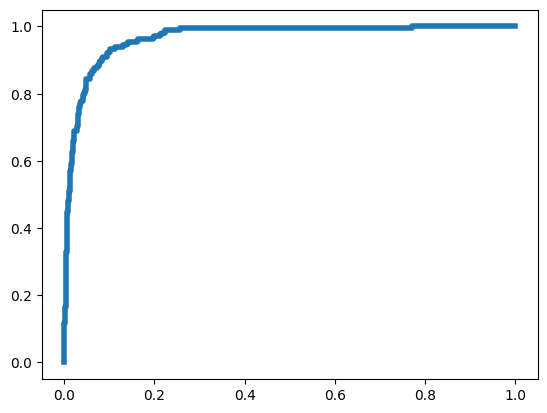

In [20]:
y_pred_prob1 = classifier_LR.predict_proba(X_valid_sc)[:,1]
fpr,tpr,thresholds = metrics.roc_curve(y_valid, y_pred_prob1)
plt.plot(fpr,tpr,linewidth=4)
plt.show()

In [21]:
metrics.roc_auc_score(y_valid, y_pred_prob1)

0.9673902579899885

Youden's J statistics is chosen as a metric to determine the threshold for classification because it provides a trade-off between sensitivity and specificity. 



$J = Sensitivity + Specificity – 1  = True Positive Rate – False Positive Rate$



In [22]:
J1 = tpr - fpr
J1

array([0.        , 0.00471698, 0.11792453, 0.11622385, 0.16339366,
       0.16169298, 0.32678732, 0.32508664, 0.34395456, 0.34225388,
       0.44131049, 0.43960981, 0.47262867, 0.47092799, 0.49922988,
       0.4975292 , 0.50696316, 0.50526248, 0.55714927, 0.55544859,
       0.57431652, 0.57261584, 0.61035169, 0.60865101, 0.64166988,
       0.63826851, 0.6665704 , 0.65976768, 0.67391862, 0.67221794,
       0.70995379, 0.70825311, 0.72712104, 0.72542036, 0.7395713 ,
       0.73616994, 0.74088692, 0.73748556, 0.74691952, 0.74521884,
       0.7546528 , 0.75295212, 0.75766911, 0.75596843, 0.76540239,
       0.76370171, 0.79672058, 0.78821717, 0.80236812, 0.79726608,
       0.80670004, 0.801598  , 0.81103196, 0.80422924, 0.80894622,
       0.80554486, 0.81497882, 0.81157746, 0.81629444, 0.81289308,
       0.82232704, 0.81892568, 0.82364266, 0.81513926, 0.82457323,
       0.82117186, 0.82588885, 0.82418817, 0.82890515, 0.82720447,
       0.83192145, 0.82171737, 0.82643435, 0.80772686, 0.81244

In [23]:
# Define the best threshold according to maximum J statistic
print("The best threshold according to the J statistic is " + str(thresholds[np.argmax(J1)]))

The best threshold according to the J statistic is 0.4165274011486071


In [24]:
threshold = thresholds[np.argmax(J1)]
y_validation_pred1= np.where(y_pred_prob1 < threshold, 0, 1)

In [25]:
# Confusion Matrix
print(confusion_table(y_validation_pred1,y_valid))

Truth        0    1
Predicted          
0          528   14
1           60  198


In [26]:
# Classification Report
print(classification_report(y_valid, y_validation_pred1))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       588
           1       0.77      0.93      0.84       212

    accuracy                           0.91       800
   macro avg       0.87      0.92      0.89       800
weighted avg       0.92      0.91      0.91       800



**DECISION TREE**

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib.pyplot import subplots

In [28]:
# Using cross-validation to tune parameter 'alpha', which is the tree pruning parameter that controls the complexity of the tree
tuned_parameters = [{"max_leaf_nodes": [i for i in range(2,11)]}]
# Tune the parameter by 10-fold cross-validation
classifier_DT = GridSearchCV(DecisionTreeClassifier(random_state = 287), tuned_parameters, scoring='f1',cv=10)
# Fit the model
classifier_DT.fit(X_resampled, y_resampled)
print("Best parameters set found on validation set:")
print(classifier_DT.best_params_)

Best parameters set found on validation set:
{'max_leaf_nodes': 8}


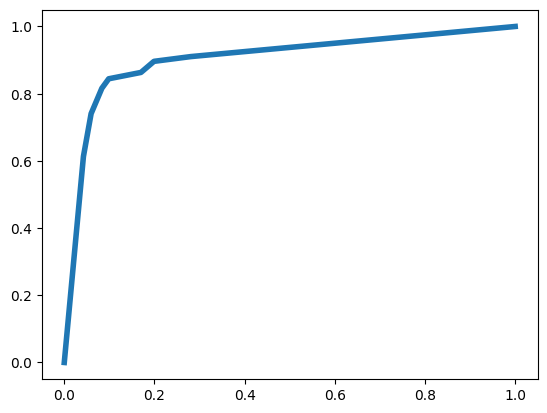

In [29]:
y_pred_prob2 = classifier_DT.predict_proba(X_valid_sc)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_valid,y_pred_prob2)
plt.plot(fpr, tpr, linewidth=4)
plt.show()

In [30]:
# Calculate AUC 
metrics.roc_auc_score(y_valid, y_pred_prob2)

0.9030933127968169

In [31]:
# Calculate Youden's J statistic as a threshold
J2 = tpr - fpr
J2

array([0.        , 0.57069054, 0.68104223, 0.7327044 , 0.74570017,
       0.69313952, 0.69724682, 0.62976511, 0.        ])

In [32]:
print("The best threshold according to the J statistic is " + str(thresholds[np.argmax(J2)]))

The best threshold according to the J statistic is 0.367816091954023


In [33]:
threshold = thresholds[np.argmax(J2)]
y_validation_pred2 = np.where(y_pred_prob2 < threshold, 0, 1)
print(confusion_table(y_validation_pred2,y_valid))

Truth        0    1
Predicted          
0          530   33
1           58  179


In [34]:
print(classification_report(y_valid, y_validation_pred2))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       588
           1       0.76      0.84      0.80       212

    accuracy                           0.89       800
   macro avg       0.85      0.87      0.86       800
weighted avg       0.89      0.89      0.89       800



**EVALUATION ON VALIDATION SET**

- Both Logistic regression and Decision Tree models performed well on the validation set, achieving high accuracy of 91% and 89%, respectively.
- In the context of customer churn analysis, False Negatives(FN) - a metric measuring the number of customers that were predicted to stay, but eventually churned, are more "expensive" than False Positives (FP). The results showed that Logistic Regression predicted fewer False Negatives (14) compared to Decision Tree (33), thus, giving a higher recall scores. 
- Therefore, Logistic Regression is the preferred model. 
- The better performance of Logistic Regression could be due to the fact that the two classes (Churn = 0 and Churn = 1) is linearly separable, and a model for complex, non-linear relationship like Decision Tree is not good at capturing this linearity. 

In [35]:
# Retrain Logistic Regression model on the full training + validation set
X_full = pd.concat((pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(X_valid_sc, columns=X.columns)))
y_full = pd.concat((y_resampled, y_valid))

In [36]:
classifier_LR_final = LogisticRegression(penalty='l1', solver='liblinear', random_state = 287, C = classifier_LR.best_params_['C'])
classifier_LR_final.fit(X_full, y_full)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_train.columns)
y_pred_prob_final = classifier_LR_final.predict_proba(X_test_sc)[:,1]  

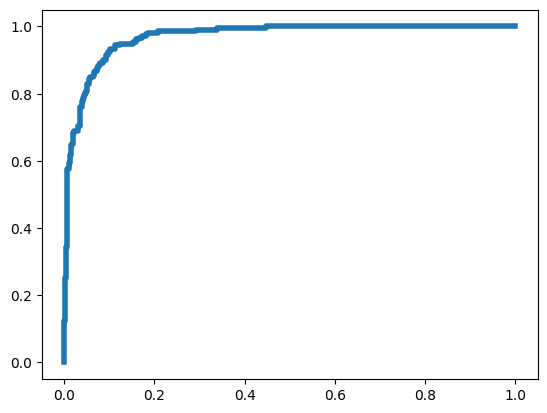

In [37]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob_final)
plt.plot(fpr, tpr, linewidth=4)
plt.show()

In [38]:
# Calculate Area-Under-Curve (AUC) metric
metrics.roc_auc_score(y_test, y_pred_prob_final)

0.9693316005647542

In [39]:
# Apply threshold 
threshold =  thresholds[np.argmax(J1)]
y_test_pred = np.where(y_pred_prob_final > threshold, 1, 0)

In [40]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       588
           1       0.77      0.93      0.84       212

    accuracy                           0.91       800
   macro avg       0.87      0.91      0.89       800
weighted avg       0.92      0.91      0.91       800



In [41]:
# Confusion Matrix 
print(confusion_table(y_test_pred, y_test))

Truth        0    1
Predicted          
0          529   15
1           59  197


In [42]:
# Feature importance
summary = pd.DataFrame({
    'Variable': X_full.columns,
    'Coefficient': classifier_LR_final.coef_[0]
})
summary['AbsCoefficient'] = np.abs(summary['Coefficient'])
summary = summary.sort_values(by='AbsCoefficient', ascending=False)
summary

,Variable,Coefficient,AbsCoefficient
8,Lifetime,-3.096823,3.096823
4,Contract_plan,-1.452324,1.452324
9,Avg_class_frequency_current_month,-1.301143,1.301143
6,Age,-1.074719,1.074719
7,Avg_additional_charges_total,-0.526968,0.526968
5,Group_visits,-0.370278,0.370278
10,Contract_renew_potential,-0.301165,0.301165
3,Promo_friends,-0.251593,0.251593
1,Near_Location,-0.065262,0.065262
2,Partner,-0.031394,0.031394


Top features that contribute to customer churn are: Lifetime, Contract_plan, Avg_class_frequency_current_month,Age. 